<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(2_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.8_n20.csv',
 'data_multi_delta_2.8_n30.csv',
 'data_multi_delta_2.8_n60.csv',
 'data_multi_delta_2.8_n120.csv',
 'data_multi_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,35.132896,23.501746,-121.289855,-52.655213,172.489127,-225.144339
1,0.0,1.0,86.298194,38.864507,-192.173034,-57.010332,-22.857902,-34.152430
2,0.0,2.0,58.832436,57.417791,779.779203,906.029430,182.740830,723.288600
3,0.0,3.0,21.156678,94.047061,910.547846,1035.751585,506.787587,528.963998
4,0.0,4.0,23.699788,54.847643,-49.046427,39.501004,346.865988,-307.364983
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.268630,45.246901,-397.459026,-271.943494,-5.962324,-265.981171
29996,999.0,26.0,41.970177,46.195689,-3.359137,94.806729,59.212162,35.594567
29997,999.0,27.0,52.345470,25.046042,4.673786,92.065298,29.383401,62.681898
29998,999.0,28.0,95.403891,83.175410,744.836242,933.415543,-52.792879,986.208423


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,35.132896,23.501746,-121.289855,-52.655213,172.489127,-225.144339
1,0.0,1.0,86.298194,38.864507,-192.173034,-57.010332,-22.857902,-34.152430
2,0.0,2.0,58.832436,57.417791,779.779203,906.029430,182.740830,723.288600
3,0.0,3.0,21.156678,94.047061,910.547846,1035.751585,506.787587,528.963998
4,0.0,4.0,23.699788,54.847643,-49.046427,39.501004,346.865988,-307.364983
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.268630,45.246901,-397.459026,-271.943494,-5.962324,-265.981171
29996,999.0,26.0,41.970177,46.195689,-3.359137,94.806729,59.212162,35.594567
29997,999.0,27.0,52.345470,25.046042,4.673786,92.065298,29.383401,62.681898
29998,999.0,28.0,95.403891,83.175410,744.836242,933.415543,-52.792879,986.208423


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e            Y       y_hat  \
rep   index                                                              
0.0   0.0    35.132896  23.501746 -121.289855   -52.655213  172.489127   
      1.0    86.298194  38.864507 -192.173034   -57.010332  -22.857902   
      2.0    58.832436  57.417791  779.779203   906.029430  182.740830   
      3.0    21.156678  94.047061  910.547846  1035.751585  506.787587   
      4.0    23.699788  54.847643  -49.046427    39.501004  346.865988   
...                ...        ...         ...          ...         ...   
999.0 25.0   70.268630  45.246901 -397.459026  -271.943494   -5.962324   
      26.0   41.970177  46.195689   -3.359137    94.806729   59.212162   
      27.0   52.345470  25.046042    4.673786    92.065298   29.383401   
      28.0   95.403891  83.175410  744.836242   933.415543  -52.792879   
      29.0   46.522645  25.607356  -58.680824    23.449176   42.898435   

                  e_hat  
rep   index              
0.0   0.0   -225.144339  
      1.0    -34.152430  
      2.0    723.288600  
      3.0    528.963998  
      4.0   -307.364983  
...                 ...  
999.0 25.0  -265.981171  
      26.0    35.594567  
      27.0    62.681898  
      28.0   986.208423  
      29.0   -19.449259  

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e            Y       y_hat  \
rep   index                                                              
0.0   0.0    35.132896  23.501746 -121.289855   -52.655213  172.489127   
      1.0    86.298194  38.864507 -192.173034   -57.010332  -22.857902   
      2.0    58.832436  57.417791  779.779203   906.029430  182.740830   
      3.0    21.156678  94.047061  910.547846  1035.751585  506.787587   
      4.0    23.699788  54.847643  -49.046427    39.501004  346.865988   
...                ...        ...         ...          ...         ...   
999.0 25.0   70.268630  45.246901 -397.459026  -271.943494   -5.962324   
      26.0   41.970177  46.195689   -3.359137    94.806729   59.212162   
      27.0   52.345470  25.046042    4.673786    92.065298   29.383401   
      28.0   95.403891  83.175410  744.836242   933.415543  -52.792879   
      29.0   46.522645  25.607356  -58.680824    23.449176   42.898435   

                  e_hat  
rep   index              
0.0   0.0   -225.144339  
      1.0    -34.152430  
      2.0    723.288600  
      3.0    528.963998  
      4.0   -307.364983  
...                 ...  
999.0 25.0  -265.981171  
      26.0    35.594567  
      27.0    62.681898  
      28.0   986.208423  
      29.0   -19.449259  

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,35.132896,23.501746,-121.289855,-52.655213,172.489127,-225.144339
1,0.0,1.0,86.298194,38.864507,-192.173034,-57.010332,-22.857902,-34.152430
2,0.0,2.0,58.832436,57.417791,779.779203,906.029430,182.740830,723.288600
3,0.0,3.0,21.156678,94.047061,910.547846,1035.751585,506.787587,528.963998
4,0.0,4.0,23.699788,54.847643,-49.046427,39.501004,346.865988,-307.364983
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.268630,45.246901,-397.459026,-271.943494,-5.962324,-265.981171
29996,999.0,26.0,41.970177,46.195689,-3.359137,94.806729,59.212162,35.594567
29997,999.0,27.0,52.345470,25.046042,4.673786,92.065298,29.383401,62.681898
29998,999.0,28.0,95.403891,83.175410,744.836242,933.415543,-52.792879,986.208423


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e            Y       y_hat  \
rep   index                                                              
0.0   0.0    35.132896  23.501746 -121.289855   -52.655213  172.489127   
      1.0    86.298194  38.864507 -192.173034   -57.010332  -22.857902   
      2.0    58.832436  57.417791  779.779203   906.029430  182.740830   
      3.0    21.156678  94.047061  910.547846  1035.751585  506.787587   
      4.0    23.699788  54.847643  -49.046427    39.501004  346.865988   
...                ...        ...         ...          ...         ...   
999.0 25.0   70.268630  45.246901 -397.459026  -271.943494   -5.962324   
      26.0   41.970177  46.195689   -3.359137    94.806729   59.212162   
      27.0   52.345470  25.046042    4.673786    92.065298   29.383401   
      28.0   95.403891  83.175410  744.836242   933.415543  -52.792879   
      29.0   46.522645  25.607356  -58.680824    23.449176   42.898435   

                  e_hat  
rep   index              
0.0   0.0   -225.144339  
      1.0    -34.152430  
      2.0    723.288600  
      3.0    528.963998  
      4.0   -307.364983  
...                 ...  
999.0 25.0  -265.981171  
      26.0    35.594567  
      27.0    62.681898  
      28.0   986.208423  
      29.0   -19.449259  

[30000 rows x 6 columns]

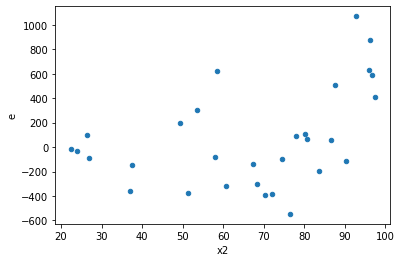

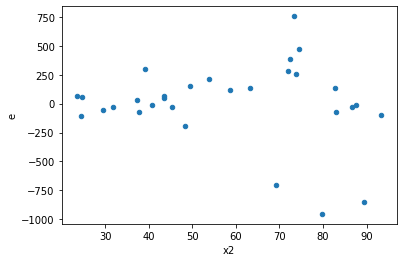

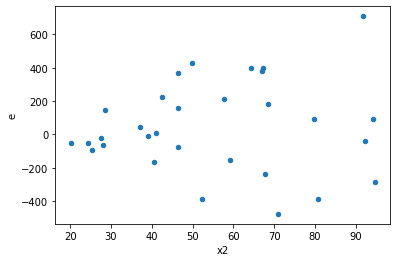

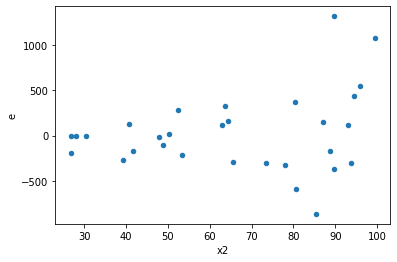

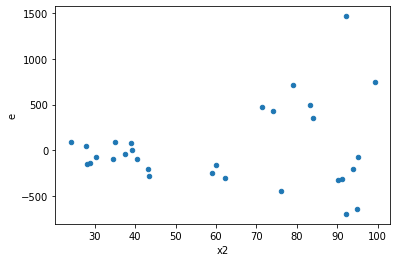

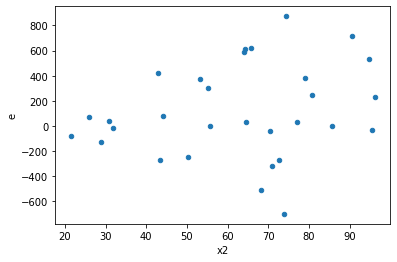

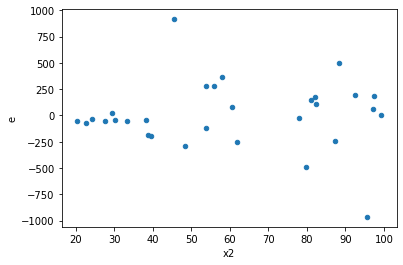

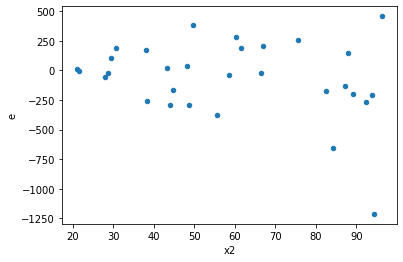

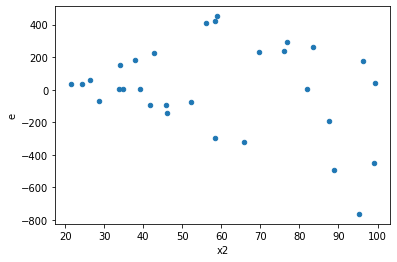

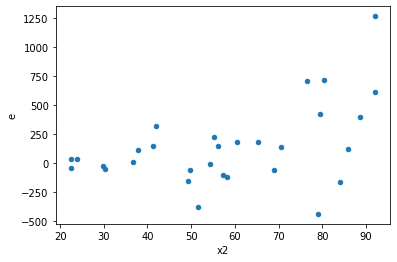

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,10.0,477525.430106094,2504115.8936095154,47752.5430106094,250411.58936095153,5.243942491299708,0.01503330976717665,0.9924833451164117,0.007516654883588325,Reject005=0 : Heteroscedasticity
1.0,10.0,10.0,115704.3072188919,1366004.737379422,11570.43072188919,136600.4737379422,11.805997289238203,0.0005595088674299475,0.999720245566285,0.00027975443371497377,Reject005=0 : Heteroscedasticity
2.0,10.0,10.0,786234.9240028614,3113797.496871993,78623.49240028614,311379.7496871993,3.960390720141377,0.040497489132180764,0.9797512554339096,0.020248744566090382,Reject005=0 : Heteroscedasticity
3.0,10.0,10.0,106947.53000248128,2653480.6047165906,10694.753000248127,265348.06047165906,24.811050845728065,1.9294947225967363e-05,0.999990352526387,9.647473612983681e-06,Reject005=0 : Heteroscedasticity
4.0,10.0,10.0,423406.86404020933,1856510.1217491406,42340.68640402093,185651.01217491407,4.384695382672953,0.02858030025225422,0.9857098498738729,0.01429015012612711,Reject005=0 : Heteroscedasticity
5.0,10.0,10.0,99016.88679888209,3671622.863104183,9901.688679888208,367162.28631041833,37.08077462142182,2.8805255221087123e-06,0.999998559737239,1.4402627610543561e-06,Reject005=0 : Heteroscedasticity
6.0,10.0,10.0,616635.1046146802,1812444.6095361568,61663.51046146802,181244.46095361566,2.939249802634425,0.10398282590003949,0.9480085870499803,0.051991412950019744,Reject005=1 : Homoscedasticity
7.0,10.0,10.0,140163.40163114687,1194446.1616558912,14016.340163114688,119444.61616558912,8.521812026217715,0.0022355906544151427,0.9988822046727924,0.0011177953272075714,Reject005=0 : Heteroscedasticity
8.0,10.0,10.0,258118.90116368138,2392158.072065483,25811.890116368137,239215.80720654828,9.267659444081314,0.0015761167586962888,0.9992119416206519,0.0007880583793481444,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,477525.430106094,2504115.8936095154,47752.5430106094,250411.58936095153,5.243942491299708,0.01503330976717665,Reject005=0 : Heteroscedasticity
1.0,10.0,10.0,115704.3072188919,1366004.737379422,11570.43072188919,136600.4737379422,11.805997289238203,0.0005595088674299475,Reject005=0 : Heteroscedasticity
2.0,10.0,10.0,786234.9240028614,3113797.496871993,78623.49240028614,311379.7496871993,3.960390720141377,0.040497489132180764,Reject005=0 : Heteroscedasticity
3.0,10.0,10.0,106947.53000248128,2653480.6047165906,10694.753000248127,265348.06047165906,24.811050845728065,1.9294947225967363e-05,Reject005=0 : Heteroscedasticity
4.0,10.0,10.0,423406.86404020933,1856510.1217491406,42340.68640402093,185651.01217491407,4.384695382672953,0.02858030025225422,Reject005=0 : Heteroscedasticity
5.0,10.0,10.0,99016.88679888209,3671622.863104183,9901.688679888208,367162.28631041833,37.08077462142182,2.8805255221087123e-06,Reject005=0 : Heteroscedasticity
6.0,10.0,10.0,616635.1046146802,1812444.6095361568,61663.51046146802,181244.46095361566,2.939249802634425,0.10398282590003949,Reject005=1 : Homoscedasticity
7.0,10.0,10.0,140163.40163114687,1194446.1616558912,14016.340163114688,119444.61616558912,8.521812026217715,0.0022355906544151427,Reject005=0 : Heteroscedasticity
8.0,10.0,10.0,258118.90116368138,2392158.072065483,25811.890116368137,239215.80720654828,9.267659444081314,0.0015761167586962888,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    867
Reject005=1 : Homoscedasticity      133
Name: Result_test, dtype: int64